# Week 9-- Machine learning
The goal of this week is to give you a flavor of what you can do with machine learning, introduce of few very useful algorithms, and eventually apply this to something we care about-- computational genetics. 

Our basic goal is to use existing data (a so-called training set, more on this in a moment) to make predictions about new data that we encounter in the work. Traditionally the way to make such predictions was to rely on what we call a *generative* model, i.e. a probabilitistic model that describes the process from which our observed data was generated. With such a generative model in hand, we could then take new data and learn things like the values of parameters from the model which produced the observations. But what if we are unsure of the model? Can we still make useful predictions? The answer is yes and one very popular way is through machine learning.

This week we will focus on a branch of machine learning (ML) called supervised ML. Supervised ML starts with a *labeled* or known dataset that we will call the training set. This training set allows us to teach an algorithm about how independent variables (call them $X$) map to dependent variables ($y$). As such we will focus on the *conditional probability* $p(y | X)$ and the models we will use are said to be *discriminative* models. The key here is that the algorithms that we will train with our training set will focus directly on the mapping from $X \rightarrow y$ rather than on the structure of the model per se. This has proven extremely useful in practice, and high prediction accuracies can be acheived for very complex problems-- problems that are often to complex to write down a full blown probabilistic model. So let's get cracking.


## Anderson's iris data redux
This is a perfect first example because R. A. Fisher used these data in his 1936 paper entitled *The use of multiple measurements in taxonomic problems*. In that paper Fisher introduced a method called linear discriminant analysis (LDA) that is considered by some to be the first machine learning method. This dataset consists of 4 morphological measurements from 150 flowers belonging to three species, *Iris setosa*, *Iris virginica*, and *Iris versicolor*. 
Let's take a quick look at the plants 


<img src=imgs/Iris_setosa.jpg align="left" /> <img src=imgs/Iris_virginica.jpg align="left" /> <img src=imgs/Iris_versicolor.jpg align="left" /> 
    
From left to right these are I. setosa, I. virginica, and I. versicolor.

These are look reasonably similar to my untrained eye. We will take a quick look at a summary of the data, then plot a subset of the data and see how it shakes out. We will be using the `sklearn` package for all of our exploration today. The iris dataset is included within it.


now let's import our data and get moving

In [1]:
import sklearn
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]

# Take a look at df_iris
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As on week 4 we will create a pairplot to examine everything

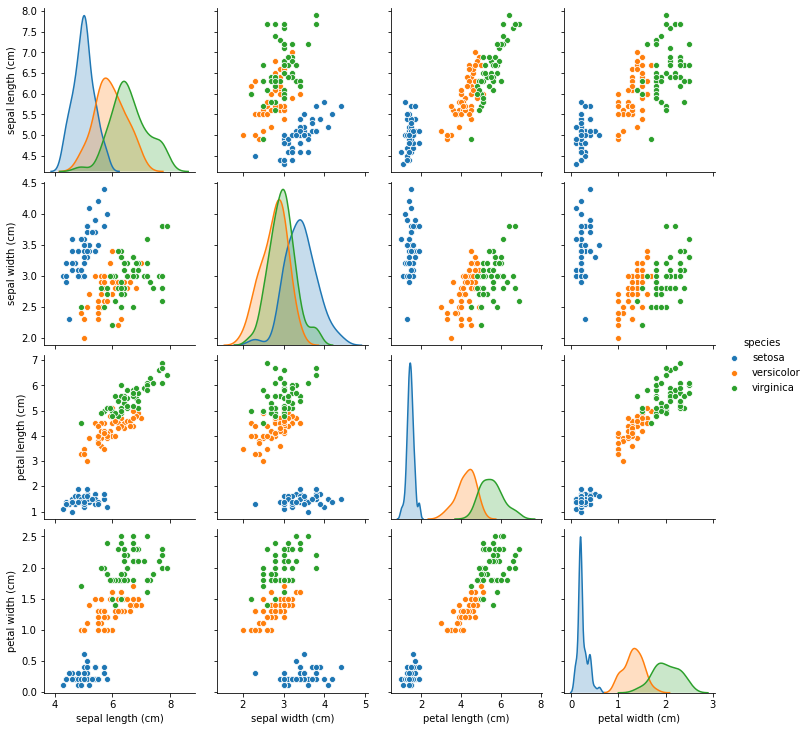

In [2]:
sns.pairplot(df_iris, hue='species')

So in comparing these two *features*, sepal length and sepal width, the species don't look perfectly seperable (i.e. we can't draw firm dividing lines between groups). That's ok, we're gonna solve this problem with ML!

## Classifying irises using support vector machines

The first ML algorithm we will look at are called Support Vector Machines (SVMs). SVMs were first developed by Vladimir Vapnik and Alexey Chervonenkis in 1963, but only became really popular in the mid 1990s after a few modifications to the original method were made and computing power had advanced sufficiently. The name of the game for SVMs is to draw an optiminally separately hyperplane between classes identified in training data. Such a hyperplane would linearly distinguish among groups in the training set such that new predictions of unlabelled data could be made. Multiple embellishments on the vanilla SVM have been made over the years which allow nonlinear discrimination and even potentially mislabelled training examples (i.e. soft margins). We will use the iris dataset to try to classify individual datapoints into their representative species.

In this case we will start by using the complete iris dataset as our training set. First we will fit a linear SVM to it and then visualize the decision surface. We will do this at first with only the sepal features (sepal length and width) and then will include the petal features later.

First let me import some helpful stuff

In [3]:
from sklearn import svm
from sklearn.datasets import make_blobs

# bring in some helper functions
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Now let's work with the iris data

Text(0.5, 1.0, 'linear SVM')

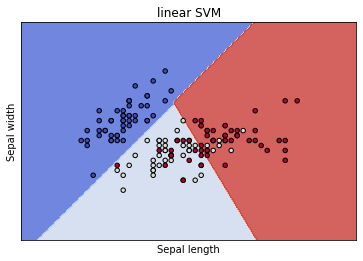

In [4]:
# Take the first two features
X = iris.data[:, :2]
y = iris.target # target here is 0, 1, 2



#Support Vector Machine
C = 100.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)
         
model = clf.fit(X, y)


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)

ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("linear SVM")

So above we have plotted the same data as before, but now having fit a linear SVM to the training set. You can see the data as they fall along the linear, separating hyperplane among classes.

So we can see that while setosa is easier to classifiy, versicolor and virginica have a bunch of overlap in the SVM we just trained. Before we move on let's quantify the accuracy of our SVM by making it do prediction. For the sake of brevity we will just do prediction from the training set we already used. 

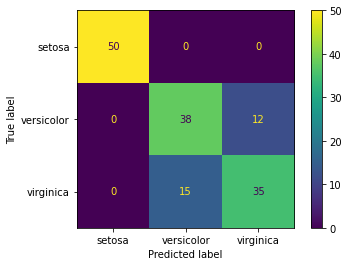

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
preds = clf.predict(X)
plot_confusion_matrix(clf, X, y, display_labels=df_iris.species.unique())  

The table we just output is often called the *confusion matrix* in the ML work. On columns we have the true value of the individual data points, on the rows the predicted value. We can see that 98% of setosa examples are correctly classified, but only a much smaller percentage of versicolor and virginica examples are correctly classified. This fits with what we saw on our decision surfaces.

### Moar features! Moar kernels!

To improve our accuracy a bit lets first use all of the features of the iris dataset, both the sepal measurements and the petal measurements. 

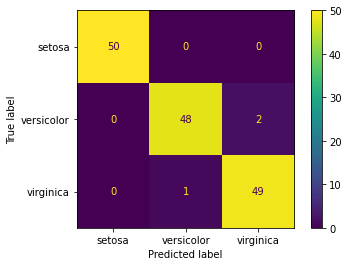

In [6]:
# get all the features
X = iris.data
y = iris.target # target here is 0, 1, 2



#Support Vector Machine
C = 100.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=C)
model = clf.fit(X, y)

preds = clf.predict(X)
plot_confusion_matrix(clf, X, y, display_labels=df_iris.species.unique())  

So including the petal measurements improved things quite a bit. We are now seeing classification accuracies of 94% and 98% for versicolor and virginica respectively. 

Can we do even better? Well there isn't much room for improvement but a simple thing we can try is moving from a linear hyperplane for the SVM to a nonlinear decision surface. In the context of SVMs this can be done by changing what is called the *kernel*. Without getting into the maths behind this, the kernel creates an implicit mapping of the input features to a different coordinate space, one that may allow easier separation of the classes in the data. The most popular choice for a nonlinear kernel in the context of SVMs is the radial basis function kernel. Let's try it out for our classification problem.

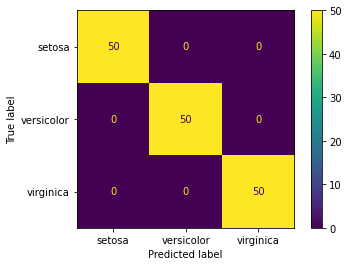

In [7]:
#Support Vector Machine
clf = svm.SVC(kernel='rbf', C=1, gamma=10) # this version takes two parameters
model = clf.fit(X, y)

#preds = clf.predict(X)
plot_confusion_matrix(clf, X, y, display_labels=df_iris.species.unique())  

So we've gone from a 2% misclassification rate to 0% with the change in kernel. Not bad. At this point I'd encourage you to play around with the other kernels that the `sklearn` SVM implementation has, for instance the sigmoid kernel. Does it do better or worse?

Let's quickly look at those decision surface visualizations that we created earlier. Note at the outset that we created the earlier ones based on a SVM that we trained with two features: sepal length and sepal width. Let's step back to that two feature input but visualize what a decision surface looks like using the radial basis function kernel. I'm going to turn up a parameter called gamma which basically controls how wiggly our kernel will get.

Text(0.5, 1.0, 'radial basis SVM')

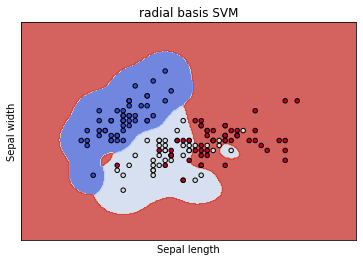

In [8]:

X = iris.data[:, :2]
y = iris.target # target here is 0, 1, 2

#Support Vector Machine
clf = svm.SVC(kernel='rbf', C=1, gamma=10) # this version takes two parameters
model = clf.fit(X, y)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.gca()
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)



ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("radial basis SVM")

So we can see now that our decision surface is altered in comparison to earlier. In particular with the RBF kernel and high gamma the SVM is doing a bit of craziness in trying to define the decision surface. 

### Lies and damn lies

So far, and mostly out of laziness, we've been using the entire Iris dataset for training AND testing. This is bad ML practice, because by testing our performance on the entire training set we are getting an over estimate of how well we are doing. So let's do the right thing shall we? Let's split our dataset into one half for training and the other half for testing the performance of our trained classifier. 

In [13]:
# test train split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=666)

We now have a *balanced* training and testing sets. They are said to be balanced in that equal numbers of examples from each class are present in the datasets. This is a key component to training a good classifier in that an unbalanced trainingset can yield a falsely accurate classifier that simply guesses the most frequent class of example present. 

Next let's retrain our svm on the training split of our data and then look at it's accuracy on the test set

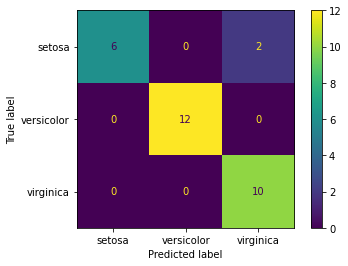

In [14]:
#Support Vector Machine
clf = svm.SVC(kernel='rbf', C=1, gamma=10) # this version takes two parameters
model = clf.fit(x_train, y_train)

preds = clf.predict(x_test)
plot_confusion_matrix(clf, x_test, y_test, display_labels=df_iris.species.unique())  

As you can see, doing the proper thing of training with one part of our data and then evaluating our fit on another has affected our performance, but just a little. Seems like our SVM classifier is doing quite well on these data!

### Using an SVM to classify genomes to country or origin
Now let's try to apply these ideas to genome data. Let's use that arabidopsis dataset we had been messing with before and bring in some meta data that I have lying around that will tell us about where the samples came from. 

Our goal here will be to treat country of origin of the plant as our target and its associate genotype (genome sequence) as the data. 